In [31]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys

'''
logging.basicConfig(stream=sys.stdout, 
                    level=logging.WARN,
                    format='%(asctime)s %(levelname)-8s %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')
'''
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.WARN,
    datefmt='%Y-%m-%d %H:%M:%S'
)

logger = logging.getLogger('LOGGER_NAME')
logger.debug('This is hidden')
logger.info('So this is shown on the console')
logger.warning('This too')

'''
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

logging.info('an info messge')
'''
'''
logging.basicConfig(format='%(asctime)s %(message)s')
logging.warning('is when this event was logged.')
'''

digits_data = load_digits()
#type(digits)
#print(type(digits.data))
#print(digits.data.shape)

#digits_df = pd.DataFrame(digits.data)
#print(digits_df.shape)


%matplotlib inline

2020-08-04 16:40:51 WARNING  This too


In [32]:
digits_data.keys()
#type(digits)

dict_keys(['images', 'target', 'data', 'target_names', 'DESCR'])

In [33]:
#digits['images'][0]

#labels = pd.DataFrame(digits_data['target'])
labels = pd.Series(digits_data['target'])
print(labels.shape)
print(labels)

(1797,)
0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int64


In [34]:
data = pd.DataFrame(digits_data['data'])
print(data.shape)
print(data.head(1))

(1797, 64)
    0    1    2     3    4    5    6    7    8    9  ...    54   55   56   57  \
0  0.0  0.0  5.0  13.0  9.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    58    59    60   61   62   63  
0  6.0  13.0  10.0  0.0  0.0  0.0  

[1 rows x 64 columns]


In [40]:
#print(digits_df.head(1))
#first_image = digits_df.iloc[0]
#first_image.drop('label',axis=1)
#np_image = first_image.values
#print(np_image)
#np_image  =np_image.reshape(32,32)

first_image = data.iloc[0]
#print(first_image)
print(type(first_image))
print(type(first_image.values))
np_image = first_image.values.reshape(8,8)
print(np_image)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


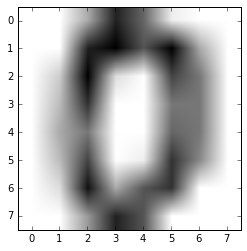

In [23]:
%matplotlib inline
plt.imshow(np_image,cmap='gray_r')

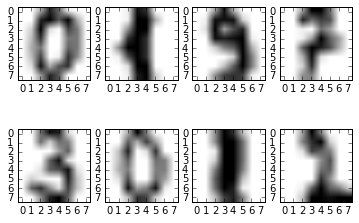

In [7]:
first_row_image1 = data.iloc[0]
image00 = first_row_image1.values.reshape(8,8)

first_row_image2 = data.iloc[99]
image01 = first_row_image2.values.reshape(8,8)


first_row_image3 = data.iloc[199]
image02 = first_row_image3.values.reshape(8,8)


first_row_image4 = data.iloc[299]
image03 = first_row_image4.values.reshape(8,8)


second_row_image1 = data.iloc[999]
image10 =second_row_image1.values.reshape(8,8)

second_row_image2 = data.iloc[1099]
image11 =second_row_image2.values.reshape(8,8)

second_row_image3 = data.iloc[1199]
image12 =second_row_image3.values.reshape(8,8)

second_row_image4 = data.iloc[1299]
#second_row_image4 = data.iloc[1796]
image13 =second_row_image4.values.reshape(8,8)



#f,a=plt.subplots(2,4,figsize=(5,5))
f,a=plt.subplots(2,4)

a[0,0].imshow(image00,cmap='gray_r')
a[0,1].imshow(image01,cmap='gray_r')
a[0,2].imshow(image02,cmap='gray_r')
a[0,3].imshow(image03,cmap='gray_r')

a[1,0].imshow(image10,cmap='gray_r')
a[1,1].imshow(image11,cmap='gray_r')
a[1,2].imshow(image12,cmap='gray_r')
a[1,3].imshow(image13,cmap='gray_r')


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(n_neighbor,feature,output):
    knn = KNeighborsClassifier(n_neighbor)
    
    #print(type(output.values.reshape(-1,)))
    #print(type(output.values))
    #print(output.values.reshape(-1,))
    #model =  knn.fit(feature,output)
    #model = knn.fit(feature,output.values.reshape(-1,))
    model = knn.fit(feature,output.values)
    
    return model

def test(model,feature,label):
    prediction = model.predict(feature)
    #print(label.shape,prediction.shape)
    #print(type(label))
    #print(type(prediction))
    
    output = pd.DataFrame()
    #output["expected"] = label.values.reshape(-1,)
    output["expected"] = label
    output["predicted"] = prediction
    #print(output.shape[0])
    accuracy = sum(output["predicted"] == output["expected"])/output.shape[0]
    #print(accuracy)
    return accuracy


def cross_validate(k):
    all_accuracy = []
    kf = KFold(n_splits=4,shuffle=False,random_state=2)    
    
    for train_index, test_index in kf.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        #print(X_train.shape,y_train.shape)
        #print(X_test.shape,y_test.shape)
        model = train(k,X_train,y_train) 
        accuracy = test(model,X_test,y_test)
        all_accuracy.append(accuracy)
    return all_accuracy
        
k=10
result = cross_validate(k)
print(len(result))
print(np.mean(result))


4
0.9527097253155159


[0.9677233358079684, 0.9616010888393962, 0.9627183865379857, 0.9649480326651819, 0.9621665429349171, 0.9588270230141054, 0.9571591190299431, 0.9571578817124474, 0.9543801039346697, 0.9527097253155159]


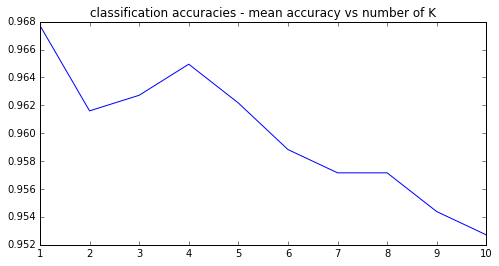

In [32]:
k = np.arange(1,11)

#print(type(k))

mean_accuracy = []

for i in k:
    accuracy = cross_validate(i)
    #all_accuracy.append(accuracy)
    mean_accuracy.append(np.mean(accuracy))
    
print(mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("classification accuracies - mean accuracy vs number of K")
plt.plot(k,mean_accuracy)


In [9]:
##sammie version
# 4 fold cross validation

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def train(neuron,feature, output):
    #mlp = MLPClassifier(hidden_layer_sizes=(neuron,),random_state=1,solver='sgd')
    #mlp = MLPClassifier(hidden_layer_sizes=(neuron,),random_state=1)
    #mlp = MLPClassifier(hidden_layer_sizes=neuron,random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=neuron)
    #model = mlp.fit(feature,output.values.reshape(-1,))
    model = mlp.fit(feature,output)
    return model
        
def test(model,feature,label):
    prediction = model.predict(feature)
    
    output = pd.DataFrame()
    #output["expected"] = label.values.reshape(-1,)
    output["expected"] = label
    output["predicted"] = prediction
    accuracy = sum(output["predicted"] == output["expected"])/output.shape[0]
    return accuracy

    
def cross_validate(neuron):
    all_accuracy = []
    kf = KFold(n_splits=4,shuffle=False,random_state=-2)   
    
    #features=pd.DataFrame(data[0])
    #labels=pd.Series(data[1])

    
    for train_index, test_index in kf.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        #print(len(X_train),len(X_test))
        model = train(neuron,X_train,y_train) 
        accuracy = test(model,X_test,y_test)
        all_accuracy.append(accuracy)
    return all_accuracy



2020-08-04 10:41:36 WARNING  before timing
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.

2020-08-04 10:41:39 WARNING  after timing
2020-08-04 10:41:39 WARNING  before timing
2020-08-04 10:41:44 WARNING  after timing
2020-08-04 10:41:44 WARNING  before timing
2020-08-04 10:41:49 WARNING  after timing
2020-08-04 10:41:49 WARNING  before timing
2020-08-04 10:44:29 WARNING  after timing
2020-08-04 10:44:29 WARNING  before timing
2020-08-04 10:46:40 WARNING  after timing
2020-08-04 10:46:40 WARNING  before timing
2020-08-04 10:49:12 WARNING  after timing


[0.875325414501361, 0.9020712694877506, 0.9343244246473645, 0.9460170749814402, 0.9398898787428853, 0.9515837663944569]


'\n[0.8352932442464736, \n0.9126268250433061, \n0.9337713437268003, \n0.9304429596634496, \n0.9426787923781242, \n0.9471294234100471]\n\n'

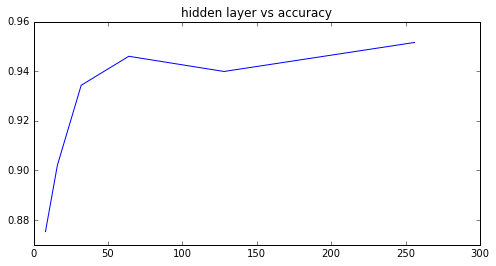

In [10]:
#Sammie version
#kf = KFold(n_splits=4,shuffle=False,random_state=2)    
#neurons = [8,16,32,64,128,256]

#neurons = [8,16,32,64,128]
#neurons = [8]
#neurons=[(8,),(16,),(32,),(64,),(128,)]
#neurons=[(256,)]
neurons=[(8,),(16,),(32,),(64,),(128,),(256,)]
all_accuracy = []


for n in neurons:
    #print("no. of hidden layer/neuron: ",n)
    logger.warning('before timing')
    result = cross_validate(n)
    mean_accuracy = np.mean(result)
    #print("accuracy:",mean_accuracy)
    #logger.info('i-timing')
    #logger.debug('d-timing')
    logger.warning('after timing')
    #datetime.datetime.now().strftime("%d.%b %Y %H:%M:%S")
    all_accuracy.append(mean_accuracy)

print(all_accuracy)  

x=[i[0] for i in neurons]


plt.figure(figsize=(8,4))
plt.title("hidden layer vs accuracy")
plt.plot(x,all_accuracy)


'''
[0.8352932442464736, 
0.9126268250433061, 
0.9337713437268003, 
0.9304429596634496, 
0.9426787923781242, 
0.9471294234100471]

2020-08-04 10:41:36 WARNING  before timing
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.

2020-08-04 10:41:39 WARNING  after timing
2020-08-04 10:41:39 WARNING  before timing
2020-08-04 10:41:44 WARNING  after timing
2020-08-04 10:41:44 WARNING  before timing
2020-08-04 10:41:49 WARNING  after timing
2020-08-04 10:41:49 WARNING  before timing
2020-08-04 10:44:29 WARNING  after timing
2020-08-04 10:44:29 WARNING  before timing
2020-08-04 10:46:40 WARNING  after timing
2020-08-04 10:46:40 WARNING  before timing
2020-08-04 10:49:12 WARNING  after timing

[0.875325414501361,
0.9020712694877506, 
0.9343244246473645, 
0.9460170749814402, 
0.9398898787428853, 
0.9515837663944569]

'''

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.8736748329621381, 0.9187552585993566, 0.925430586488493, 0.9365614946795348, 0.9487973273942093, 0.9521343726800297]


'\nsammie verison\n[0.8803489235337787, \n0.9226391982182629, \n0.9287564959168522, \n0.933783716901757, \n0.9415652066320218, \n0.948798564711705]\n\nsammie version\n[0.8279955456570156, \n0.9176391982182628, \n0.9170762187577332, \n0.9326466221232368, \n0.9493578322197476, \n0.9487998020292007]\n\n[0.8369326899282357, \n0.9226416728532542, \n0.9293157634248947, \n0.9365553080920563, \n0.9343219500123732, \n0.954364018807226]\n'

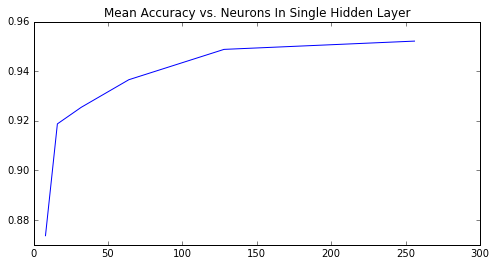

In [8]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

print(nn_one_accuracies)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

'''
sammie verison
[0.8803489235337787, 
0.9226391982182629, 
0.9287564959168522, 
0.933783716901757, 
0.9415652066320218, 
0.948798564711705]

sammie version
[0.8279955456570156, 
0.9176391982182628, 
0.9170762187577332, 
0.9326466221232368, 
0.9493578322197476, 
0.9487998020292007]

sammie version
[0.8736748329621381, 
0.9187552585993566, 
0.925430586488493, 
0.9365614946795348, 
0.9487973273942093, 
0.9521343726800297]

[0.8369326899282357, 
0.9226416728532542, 
0.9293157634248947, 
0.9365553080920563, 
0.9343219500123732, 
0.954364018807226]
'''

## single hidden layer
### KNN = 96%
### Neural Network with 4 fold cross validation = accuracy ranged from 86% to 94%

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.8263523880227666, 0.9220799307102202, 0.9232108389012621, 0.9404578074733977, 0.9510343974263795, 0.9549170997277902]


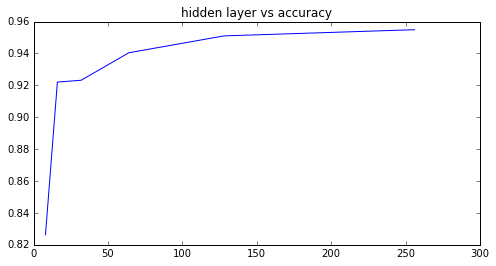

In [11]:
neurons=[(8,8),(16,16),(32,32),(64,64),(128,128),(256,256)]
all_accuracy = []


for n in neurons:
    result = cross_validate(n)
    mean_accuracy = np.mean(result)
    all_accuracy.append(mean_accuracy)

print(all_accuracy)  

'''[0.9376651818856718, 0.9437899034892353]
[0.9432454837911407, 0.9527072506805246]

[0.8263523880227666, 
0.9220799307102202, 
0.9232108389012621, 
0.9404578074733977, 
0.9510343974263795, 
0.9549170997277902]

'''

x=[i[0] for i in neurons]

plt.figure(figsize=(8,4))
plt.title("hidden layer vs accuracy")
plt.plot(x,all_accuracy)

## 2 hidden layers
### Neural network with 4 fold cross validation 
### more neuron, more accurate 
### from 82% to 95%

In [ ]:
# sammie version
# 6 fold cross validation
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def train(neuron,feature, output):
    mlp = MLPClassifier(hidden_layer_sizes=neuron)
    model = mlp.fit(feature,output)
    return model
        
def test(model,feature,label):
    prediction = model.predict(feature) 
    output = pd.DataFrame()
    output["expected"] = label
    output["predicted"] = prediction
    accuracy = sum(output["predicted"] == output["expected"])/output.shape[0] 
    return accuracy

def cross_validate(neuron):
    all_accuracy = []
    kf = KFold(n_splits=6,shuffle=False,random_state=2)   

    for train_index, test_index in kf.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        #print(len(X_train),len(X_test))
        model = train(neuron,X_train,y_train) 
        accuracy = test(model,X_test,y_test)
        all_accuracy.append(accuracy)
    return all_accuracy

In [ ]:
#Sammie version
neurons=[(10,10,10),(64,64,64),(128,128,128)]
all_accuracy = []

for n in neurons:
    logger.warning('after before')
    result = cross_validate(n)
    logger.warning('after timing')
    mean_accuracy = np.mean(result)
    all_accuracy.append(mean_accuracy)

print(all_accuracy)  

x=[i[0] for i in neurons]


plt.figure(figsize=(8,4))
plt.title("hidden layer vs accuracy")
plt.plot(x,all_accuracy)

'''0.8937086584912671, 0.9538145670754367, 0.9488089929394278

'''

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.4/logging/__init__.py", line 978, in emit
    msg = self.format(record)
  File "/usr/lib/python3.4/logging/__init__.py", line 828, in format
    return fmt.format(record)
  File "/usr/lib/python3.4/logging/__init__.py", line 565, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.4/logging/__init__.py", line 328, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/dataquest/system/env/python3/lib/python3.4/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.

### 3 hidden layer with 6 fold cross validation
### more layer more accurate
